In [1]:
from notscared.NotScared import NotScared
from notscared.tasks.SNR import SNR, SNROptions

In [2]:
filename = "../data/15x8x20000_r1_singlerail5_sr_ise_NON_PROFILED.h5"

In [3]:
ns = NotScared(
    filename = filename, 
    task = SNR,
    task_options = SNROptions(
        byte_positions=[0, 1, 2]
    )
)

In [4]:
# ns.get_num_tiles()
ns.tiles

(15, 8)

In [5]:
ns.run()

In [6]:
ns.tasks[0][0]._snr

array([[0.00313684, 0.00312422, 0.00286622, ..., 0.003384  , 0.00269305,
        0.00293889],
       [0.00279255, 0.00269551, 0.00302712, ..., 0.00350459, 0.00360805,
        0.00360215],
       [0.00297562, 0.00292441, 0.00246258, ..., 0.00277075, 0.00269247,
        0.00374483]], dtype=float32)

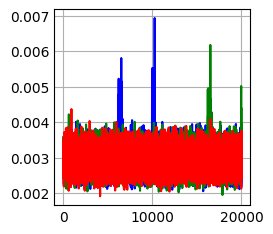

In [7]:
ns.tasks[0][0].plot()

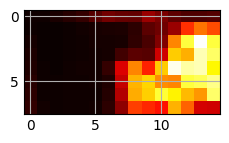

In [8]:
ns.get_heat_map()

In [9]:
from notscared.tasks.CPA import CPA, CPAOptions
from notscared.models.HammingWeight import HammingWeight
import numpy as np

In [10]:
ns = NotScared(
    filename = filename, 
    task = CPA,
    task_options = CPAOptions(
        byte_range=(0, 1),
        leakage_model = HammingWeight(),
        precision=np.float32),
)

In [11]:
ns.run()

In [13]:
ns.results[0][0]

(array([118,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1], dtype=int16),
 array([0.19241421, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ], dtype=float32))

In [15]:
np.set_printoptions(precision=1)
key_candidates = ns.results[0][0] # Access the results for tile (0,0)
print("KEY CANDIDATES:\n", key_candidates[0])
print("CORRELATION:\n", key_candidates[1])

KEY CANDIDATES:
 [118  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
CORRELATION:
 [0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


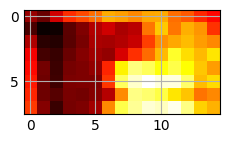

In [16]:
ns.get_heat_map()